In [1]:
import sys
import os
sys.path.append('/home/yutanagano/Projects/nnfs')
os.chdir('/home/yutanagano/Projects/nnfs')

# Data loading

In [2]:
import cv2
import numpy as np

def load_mnist_dataset(dataset, path):
    # Scan all the directories and create a list of labels
    labels = os.listdir(os.path.join(path, dataset))
    # Create lists for samples and labels
    X = []
    y = []
    # For each label folder
    for label in labels:
        # And for each image in given folder
        for file in os.listdir(os.path.join(path, dataset, label)):
            # Read the image
            image = cv2.imread(os.path.join(
                path, dataset, label, file
            ), cv2.IMREAD_UNCHANGED)
            # And append it and a label to the lists
            X.append(image)
            y.append(label)
    # Convert the data to proper numpy arrays and return
    return np.array(X), np.array(y).astype('uint8')


def create_data_mnist(path):
    # Load both sets separately
    X, y = load_mnist_dataset('train', path)
    X_test, y_test = load_mnist_dataset('test', path)
    # And return all the data
    return X, y, X_test, y_test

In [3]:
X, y, X_test, y_test = create_data_mnist('fashion_mnist_images')

In [4]:
X_test = (X_test.astype(np.float32) - 127.5) / 127.5
X_test = X_test.reshape(X_test.shape[0], -1)

In [5]:
import nnn

model = nnn.module.Module.load('fashion_mnist.model')

## Load test images

In [6]:
labels = {
    0: 'T shirt',
    1: 'Trousers',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [7]:
tshirt = cv2.imread('tshirt.jpg', cv2.IMREAD_GRAYSCALE)
tshirt = cv2.resize(tshirt, (28, 28))
tshirt = 255 - tshirt

In [8]:
trousers = cv2.imread('trousers.jpg', cv2.IMREAD_GRAYSCALE)
trousers = cv2.resize(trousers, (28, 28))
trousers = 255 - trousers

In [9]:
from matplotlib import pyplot as plt

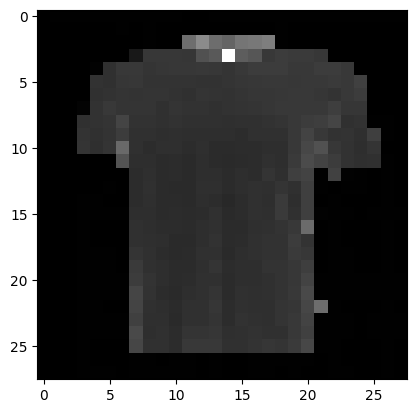

In [10]:
plt.imshow(tshirt, cmap='gray')
plt.show()

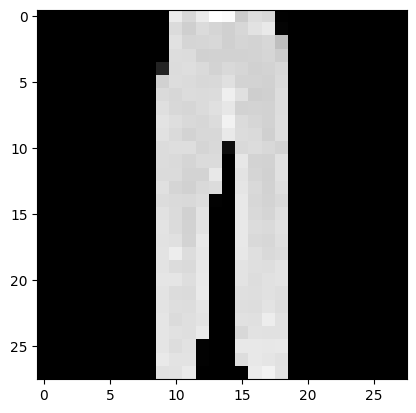

In [11]:
plt.imshow(trousers, cmap='gray')
plt.show()

In [12]:
tshirt_flat = (tshirt.reshape(1, -1).astype(np.float32) - 127.5) / 127.5
trousers_flat = (trousers.reshape(1, -1).astype(np.float32) - 127.5) / 127.5

In [13]:
confidences = model.predict(tshirt_flat)
prediction_label = model.output_layer_activation.predict(confidences)[0]
prediction = labels[prediction_label]
print(prediction)

Shirt


In [14]:
confidences = model.predict(trousers_flat)
prediction_label = model.output_layer_activation.predict(confidences)[0]
prediction = labels[prediction_label]
print(prediction)

Trousers
